In [1]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15
import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Housekeeping

## Move skylocs to appropriate directories

In [ ]:
nmc = 300
nobj = 1000
for imc in tqdm_notebook(range(200,300)):
    for iobj in tqdm_notebook(range(nobj)):
        shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask"+str(imc)+"/LL2_TSmx_lim_b_o"+str(iobj)+"_data.npz",\
                    "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask/LL2_TSmx_lim_b_o"+str(iobj)+"_data_skyloc"+str(imc)+".npz")


In [2]:
catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

nmc = 200
nobj = 1000
for imc in tqdm_notebook(range(nmc)):
    lb_temp = []
    for iobj in tqdm_notebook(range(nobj)):
        rep_angext = np.array([0.02785567,0.12069876,0.21354185,0.30638494,0.39922802,0.49207111,0.5849142,0.67775728,0.77060037,0.86344346,0.95628654,1.04912963,1.14197272,1.2348158,1.32765889,1.42050198,1.51334507,1.60618815,1.69903124,1.79187433])
        obj_angext = 2*catalog[u'rs'].values[iobj] / \
                     (Planck15.angular_diameter_distance(catalog[u'z'].values[iobj]).value*1000) \
                     * 180./np.pi
        rep_index = (np.abs(rep_angext-obj_angext)).argmin()

        lb_temp.append(np.loadtxt("../data/Tully_randlocs"+str(int(np.loadtxt("../data/Tully_skylocs_no0p5mask"+str(imc)+"/skyloc_obj"+str(iobj)+".txt")))+"/lb_obj"+str(rep_index)+".dat"))
    np.save("../data/Tully_skylocs_no0p5mask/lb_cat_mc"+str(imc)+".npy", lb_temp)

## Change some channel names to be able to open the files

In [ ]:
nobj = 1000

for iobj in tqdm_notebook(range(nobj)):
    shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_tau/LL2_TSmx_lim_\[Tau]_o"+str(iobj)+"_data.npz",\
                "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_tau/LL2_TSmx_lim_tau_o"+str(iobj)+"_data.npz")



In [ ]:
for iobj in tqdm_notebook(range(nobj)):
    shutil.move("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mu/LL2_TSmx_lim_\[Mu]_o"+str(iobj)+"_data.npz",\
                "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mu/LL2_TSmx_lim_mu_o"+str(iobj)+"_data.npz")




# Figure 1

In [3]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'
data_dir = work_dir + 'data/'


In [4]:
data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]


In [5]:
####Poisson error bands
massP = 10**data_files[2][::,0]
Lim16 = 10**data_files[2][::,1]
Lim84 = 10**data_files[3][::,1]
LimP_disp = (np.log10(Lim84) - np.log10(Lim16))/2.0

####Halo Stat error bands
massH = 10**data_files[4][::,0]
LimH16 = 10**data_files[4][::,1]
LimH84 = 10**data_files[5][::,1]
LimH_disp = (np.log10(LimH84) - np.log10(LimH16))/2.0


#####Combine the uncertainties
Lim_uncert = np.sqrt(LimP_disp**2 + LimH_disp**2)

###GCE
GCE = data_files[6]
GCE_ab = data_files[9]
GCE_calore = data_files[10]
GCE_gordan = data_files[11]

###Fermi Dwarf
massD = 10**data_files[8][::,0]
LimD = 10**data_files[8][::,1]

#####thermal
thermal = 10**data_files[12]

###Cross Corr
mDM_ary = [10,20,50,100,200,300,400,500,700,1000,10000]
lim_ary = np.array(np.array([[  3.47613312e-25,   3.19993932e-25,   4.09432255e-25,
          5.74111275e-25,   8.19273323e-25,   1.11412925e-24,
          1.54077804e-24,   1.88342427e-24,   2.45742289e-24,
          3.51413849e-24,   1.88285952e-23],
       [  6.84653178e-25,   6.11339438e-25,   8.88586835e-25,
          1.46856813e-24,   2.37706561e-24,   3.06228027e-24,
          3.78778553e-24,   4.28537842e-24,   5.06539081e-24,
          6.20444331e-24,   3.37611100e-23]]))


In [6]:
ab_mean = GCE_ab[0]
ab_up = GCE_ab[-1,1]
ab_low = GCE_ab[1,1]
ab_L = GCE_ab[3,0]
ab_R = GCE_ab[2,0]

In [7]:
plot_data_skylocs = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask',
                        elephant=False, 
                        nmc=200,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="skylocs")

In [8]:
# data_skylocs_ary, _ = plot_data_skylocs.return_limits()

In [9]:
# np.save("data_skylocs_ary",data_skylocs_ary)

In [10]:
data_skylocs_ary = np.load("data_skylocs_ary.npy")

In [11]:
# plot_data_10k = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
#                         elephant=False, 
#                         nmc=1,
#                         bcut=20,
#                         nonoverlap=True,
#                         nonoverlapradius=2.,
#                         cut_0p5=False,
#                         xsecslim=10,
#                         TS100=4,
#                         TS1000=9,
#                         halos_ran=10000, 
#                         halos_to_keep=10000,
#                         data_type="data",
#                         catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [12]:
# data_ary_10k, _ = plot_data_10k.return_limits()

In [36]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_emin4_o')

In [37]:
data_ary, _, maxTS_ary = plot_data.return_limits()

In [28]:
plot_data_nb = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=16,
                        TS1000=16,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_nb_o')

In [29]:
data_ary_nb, _, _ = plot_data_nb.return_limits()

In [17]:
plot_data_skylocs = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_skylocs_no0p5mask',
                        elephant=False, 
                        nmc=200,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="skylocs",
                        custom_good_vals=plot_data.passed_halos)

In [34]:
# data_skylocs_ary, _, maxTS_skylocs_ary = plot_data_skylocs.return_limits()

In [ ]:
# np.save("data_skylocs_200_ary",data_skylocs_ary)

In [19]:
plot_h = 10/1.2
plot_w = 8/1.2

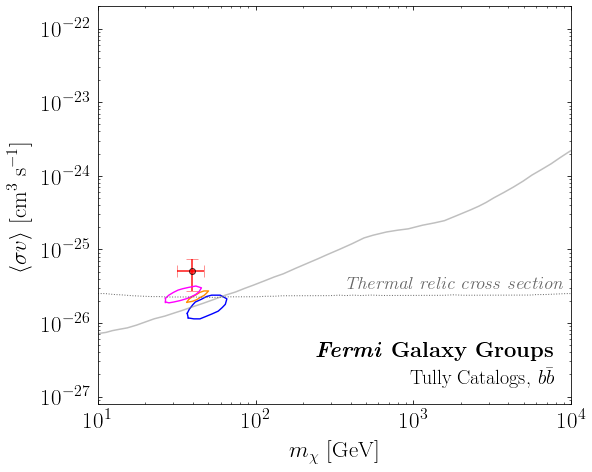

In [44]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

fudge = 1.02

# plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
# plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

# plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
# plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)',alpha=0.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

# labels = [u'Galaxy groups (this work)',
#  u'95\\% containment',
#  u'68\\% containment',
#           u'Galaxy groups, no boost',
#  u'$\\mathit{Fermi}$ dwarfs (2016)']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(950.3, 1.5e-27, r'Tully Catalogs, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

plt.savefig(plots_dir + 'dwarfs.pdf',bbox_inches='tight')



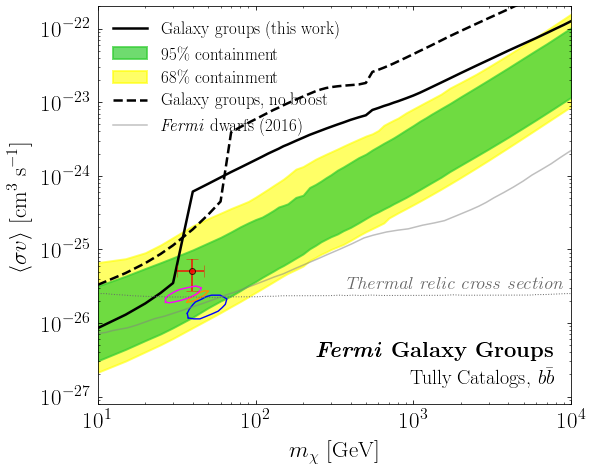

In [33]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

fudge = 1.02

plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 2.5, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
plt.fill_between(plot_data.marr,10**np.percentile(data_skylocs_ary[len(data_ary)], 16, axis=1),10**np.percentile(data_skylocs_ary[len(data_ary)], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
plt.plot(plot_data.marr,10**np.percentile(data_ary_nb[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)


plt.plot(10**GCE[::,0],10**GCE[::,1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE[[0,-1],0],10**GCE[[0,-1],1],color='darkorange',alpha= 1.0,lw=1.4)
plt.plot(10**GCE_calore[::,0],10**GCE_calore[::,1],color='blue',alpha = 1.0,lw=1.4) #label = r'Daylan et. al. 2014 (2$\sigma$)',alpha=0.5)
plt.plot(10**GCE_calore[[0,-1],0],10**GCE_calore[[0,-1],1],color='blue',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[::,0],10**GCE_gordan[::,1],color='magenta',alpha = 1.0,lw=1.4)
plt.plot(10**GCE_gordan[[0,-1],0],10**GCE_gordan[[0,-1],1],color='magenta',alpha = 1.0,lw=1.4)
plt.errorbar([10**ab_mean[0]],[10**ab_mean[1]],yerr = [ np.array([10**ab_mean[1] - 10**ab_low]), np.array([10**ab_up - 10**ab_mean[1] ]) ],
            xerr = [ np.array([10**ab_mean[0] - 10**ab_L]), np.array([10**ab_R - 10**ab_mean[0] ]) ],color='red',
            linewidth=2.0, capsize=6,capthick=.6,markersize=6,marker='o',alpha=0.7,mec='k')

plt.plot(massD,LimD,color='grey',label = r'$\mathit{Fermi}$ dwarfs (2016)',alpha=0.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)

handles,labels = ax.get_legend_handles_labels()
handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

labels = [u'Galaxy groups (this work)',
 u'95\\% containment',
 u'68\\% containment',
          u'Galaxy groups, no boost',
 u'$\\mathit{Fermi}$ dwarfs (2016)']

leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(950.3, 1.5e-27, r'Tully Catalogs, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

# plt.savefig(plots_dir + 'bounds.pdf',bbox_inches='tight')



In [ ]:
midx = 11
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([1.5e-26,3e-24])

plt.text(1.3, 3.1e-26, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 2.0e-26, r'Tully Catalogs, $b\bar b, m_\chi = 100$ GeV',fontsize=20,color='black')
plt.tight_layout()

# plt.savefig(plots_dir + 'elephant.pdf',bbox_inches='tight')




## Other elephants

In [ ]:
midx = 0
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([1.5e-27,1e-24])

plt.text(1.3, 3.1e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 1.85e-27, r'Tully Catalogs, $b\bar b, m_\chi = 10$ GeV',fontsize=20,color='black')
plt.tight_layout()

# plt.savefig(plots_dir + 'elephant10.pdf',bbox_inches='tight')





In [ ]:
midx = 52
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k',lw=2)
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[2.5],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[97.5],axis=1)[0], alpha=0.3, color='salmon')
plt.fill_between(np.arange(len(data_skylocs_ary[:,midx,:])) + 1,10**np.percentile(data_skylocs_ary[:,midx,:],[16],axis=1)[0],10**np.percentile(data_skylocs_ary[:,midx,:],[84],axis=1)[0], alpha=0.4, color='salmon')

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$N_\mathrm{H}$ (halo number)]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
plt.xlim(1,len(data_ary[:,midx,:]) + 1) 
#     plt.xlim([1e1,1e4])
plt.ylim([3e-24,1e-21])

plt.text(1.3, 6e-24, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(1.3, 3.8e-24, r'Tully Catalogs, $b\bar b, m_\chi = 10$ TeV',fontsize=20,color='black')
plt.tight_layout()

# plt.savefig(plots_dir + 'elephant10000.pdf',bbox_inches='tight')






# Tables

In [ ]:
catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [ ]:
catalog.columns.values

In [ ]:
catalog['zred'] = catalog['z']*1000
catalog['log10cvir_inf'] = np.log10(catalog['cvir_inf'])
catalog['bsh'] = 10**catalog['mulog10J_inf']/10**catalog['mulog10Jnb_inf'] - 1
catalog['paperName'] = [catalog['GName'][i] if isinstance(catalog['GName'][i], str) else catalog['Name'][i] for i in range(len(catalog))]

In [ ]:
catalog_paper = catalog.iloc[plot_data.passed_halos][['paperName','mulog10J_inf','log10Mvir_inf','zred','l','b','log10cvir_inf', 'theta_vir','bsh']].round(2).to_latex(index = False)

In [ ]:
print catalog_paper

In [ ]:
catalog_app = catalog[:100][['paperName','mulog10J_inf','log10Mvir_inf','zred','l','b','log10cvir_inf', 'theta_vir','bsh']]

In [ ]:
catalog_app['maxTS'] = [np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['TSmx'][0] for iobj in range(len(catalog_app))]

In [ ]:
print catalog_app.round(2).to_latex(index = False)

In [ ]:
catalog_lu = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLu_ALL_DATAPAPER_Planck15_v5.csv")

In [ ]:
catalog_lu['zred'] = catalog_lu['z']*1000
catalog_lu['log10cvir_inf'] = np.log10(catalog_lu['cvir_inf'])
catalog_lu['bsh'] = 10**catalog_lu['mulog10J_inf']/10**catalog_lu['mulog10Jnb_inf'] - 1
catalog_lu['paperName'] = [catalog_lu['Name'].values[i] for i in range(len(catalog_lu))]

In [ ]:
catalog_lu_app = catalog_lu[:100][['paperName','mulog10J_inf','log10Mvir_inf','zred','l','b','log10cvir_inf', 'ang_ext','bsh']]

In [ ]:
catalog_lu_app['maxTS'] = [np.load("../data/Lu/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['TSmx'][0] for iobj in range(len(catalog_lu_app))]

In [ ]:
print catalog_lu_app.round(2).to_latex(index = False)

# Sky maps

In [ ]:
l = catalog['l'][plot_data.passed_halos].values
b = catalog['b'][plot_data.passed_halos].values
s = 1000*10**catalog['mulog10J_inf'][plot_data.passed_halos].values/10**catalog['mulog10J_inf'][plot_data.passed_halos].values[0]

In [ ]:
import healpy as hp
hp.mollview(np.zeros(hp.nside2npix(128)))
hp.projscatter(l, b, lonlat=True, coord='G', marker='o', color='orange',s = s)
# for i in tqdm_notebook(range(len(l))):
#     hp.projscatter(l[i], b[i], lonlat=True, coord='G', marker='o', color='orange',s = s[i])

# Other channels

In [ ]:
plot_data_channels = []

for channel in tqdm_notebook(['e','mu','tau','q','c','t','W','Z']):
# for channel in tqdm_notebook(['tau']):

    channel_str = channel

    plot_data_temp = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_'+channel+'/////',
                            elephant=False, 
                            nmc=1,
                            bcut=20,
                            nonoverlap=True,
                            nonoverlapradius=2.,
                            cut_0p5=False,
                            xsecslim=10,
                            TS100=4,
                            TS1000=9,
                            halos_ran=1000, 
                            halos_to_keep=1000,
                            data_type="data",
                            catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                            file_prefix=r'LL2_TSmx_lim_'+channel_str+r'_o')

    plot_data_channels.append(plot_data_temp)

In [ ]:
data_ary_channels = []

for i in range(len(tqdm_notebook(plot_data_channels))):
    data_ary_channels.append(plot_data_channels[i].return_limits())

In [ ]:
plot_colors = ["forestgreen","forestgreen","forestgreen","goldenrod","goldenrod","goldenrod","lightcoral","lightcoral"]
plot_ls = ["-","--","-.","-","--","-.","-","--"]

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'$b$')



for i, label in enumerate((['e','mu','tau','q','c','t','W','Z'])):
    if label in ["mu","tau"]:
        label = "\\" + label
    label = "$" + label + "$"    
    plt.plot(plot_data.marr,[None if v == 1.0 else v for v in 10**np.percentile(data_ary_channels[i][0][-1], 16, axis=1)], label=label, color=plot_colors[i],ls=plot_ls[i])

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(310.3, 1.5e-27, r'Other annihilation channels',fontsize=20,color='black')

plt.legend(ncol=2,fancybox=True,facecolor='none',frameon=False,loc='upper left')

plt.tight_layout()

plt.savefig(plots_dir + 'other_annh.pdf',bbox_inches='tight')




# Systematics

In [ ]:
plot_data_Lu = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Lu//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLu_ALL_DATAPAPER_Planck15_v5.csv")

In [ ]:
data_ary_Lu, _ = plot_data_Lu.return_limits()

In [ ]:
plot_data_p7 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_p7///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=True,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [ ]:
data_ary_p7, _ = plot_data_p7.return_limits()

In [ ]:
plot_data_UCV3 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_UCV3///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [ ]:
data_ary_UCV3, _ = plot_data_UCV3.return_limits()

In [ ]:
plot_data_useboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_useboost////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [ ]:
data_ary_useboost, _ = plot_data_useboost.return_limits()

In [ ]:
plot_data_Burkert = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_Burkert///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                             file_prefix="LL2_TSmx_lim_b_Burk_o")

In [ ]:
data_ary_Burkert, _ = plot_data_Burkert.return_limits()

In [ ]:
plot_data_diemerconc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_diemerconc///',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_diemerconc_v7.csv"
                                )

In [ ]:
data_ary_diemerconc, _ = plot_data_diemerconc.return_limits()

In [ ]:
plot_data_gaoboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_gaoboost////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_gaoboost_v7.csv"
                                )

In [ ]:
data_ary_gaoboost, _ = plot_data_gaoboost.return_limits()

In [ ]:
plot_data_mmin1e4 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_mmin1e4////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_mmin1e4_v7.csv"
                                )

In [ ]:
data_ary_mmin1e4, _ = plot_data_mmin1e4.return_limits()

In [ ]:
plot_data_sanchezboost = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_sanchezboost/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_sanchezboost_v7.csv"
                                )

In [ ]:
data_ary_sanchezboost, _ = plot_data_sanchezboost.return_limits()

In [ ]:
plot_data_alpha20 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully_sanchezboost/////',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_alpha20_v7.csv"
                                )

In [ ]:
data_ary_alpha20, _ = plot_data_alpha20.return_limits()

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline (Tully catalogs)')
plt.plot(plot_data.marr,10**np.percentile(data_ary_Lu[-1], 2.5, axis=1), alpha=1, color='k',label=r'Lu group catalog',ls='--')



plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(1100.3, 1.5e-27, r'Lu group catalog',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_lu.pdf',bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

for midx in [11]:
    plt.plot(np.arange(len(data_ary[:,midx,:])) + 1,10**np.percentile(data_ary[:,midx,:],[50],axis=1)[0], color='k', ls='-', label="Baseline (Tully catalogs)")
    plt.plot(np.arange(len(data_ary_Lu[:,midx,:])) + 1,10**np.percentile(data_ary_Lu[:,midx,:],[50],axis=1)[0], color='k', ls='--', label="Lu group catalog")


#     plt.title("$M_\chi$ = " + str(int(plot_data_skylocs.marr[midx])) + " GeV")
    
    plt.xlabel("$N_h$",fontsize=23)
    plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]",fontsize=23)
    
    plt.xscale("log")
    plt.yscale("log")
    
    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)
    plt.text(15.3, 1.5e-26, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
    plt.text(60.3, 0.9e-26, r'Lu group catalog',fontsize=20,color='black')


    plt.ylim(5e-27,5e-24)
    plt.xlim(min(np.arange(len(data_ary_Lu[:,midx,:]))),max(np.arange(len(data_ary_Lu[:,midx,:]))))
    plt.tight_layout()


    plt.savefig(plots_dir + "systematics_lu_elephant.pdf")
    plt.show()

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_p7[-1], 2.5, axis=1), alpha=1, color='k',label=r'\texttt{p7v6} diffuse model',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_UCV3[-1], 2.5, axis=1), alpha=1, color='k',label=r'Top PSF quartile',ls='-.')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(63., 1.5e-27, r'Data set and foreground model variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_dataset.pdf',bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_useboost[-1], 2.5, axis=1), alpha=1, color='k',label=r'$\rho_\mathrm{NFW}$-boosted profile',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_Burkert[-1], 2.5, axis=1), alpha=1, color='k',label=r'Burkert profile',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_diemerconc[-1], 2.5, axis=1), alpha=1, color='k',label=r'Diemer concentration',ls=':')





plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(70.3, 1.5e-27, r'Halo profile and concentration variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_profile_conc.pdf',bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline (Bartels)')
plt.plot(plot_data.marr,10**np.percentile(data_ary_mmin1e4[-1], 2.5, axis=1), alpha=1, color='k',label=r'Bartels $M_\mathrm{min} = 10^{4}M_\odot$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_alpha20[-1], 2.5, axis=1), alpha=1, color='k',label=r'Bartels $\alpha = 2.0$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_sanchezboost[-1], 2.5, axis=1), alpha=1, color='k',label=r"{Molin\'{e}}",ls=':')
plt.plot(plot_data.marr,10**np.percentile(data_ary_gaoboost[-1], 2.5, axis=1), alpha=1, color='grey',label=r'Gao',ls='--')







plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(540.3, 1.5e-27, r'Boost model variations',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_boost.pdf',bbox_inches='tight')

# Individual halos

In [ ]:
plot_single_mcs = []
plot_single_datas = []

maxts_single_mcs = []
maxts_single_datas = []


for i in tqdm_notebook(range(10)):
    plot_single_mc, _, maxts_single_mc  = plot_data_skylocs.return_limits_single(i)
    plot_single_data, _, maxts_single_data= plot_data.return_limits_single(i)
    
    plot_single_mcs.append(plot_single_mc)
    plot_single_datas.append(plot_single_data)
    
    maxts_single_mcs.append(maxts_single_mc)
    maxts_single_datas.append(maxts_single_data)

In [ ]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,20))

# for sidx in [0]:
for idx,i in tqdm_notebook(enumerate(range(10))):

    

    oFig1.add_subplot(5,2,idx+1)
    plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs[i], 2.5, axis=1),10**np.percentile(plot_single_mcs[i], 97.5, axis=1), alpha=0.6, color='yellow')
    plt.fill_between(plot_data.marr,10**np.percentile(plot_single_mcs[i], 16, axis=1),10**np.percentile(plot_single_mcs[i], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,10**np.percentile(plot_single_datas[i], 2.5, axis=1), alpha=1., color='k',ls='-')

    plt.yscale("log")
    plt.xscale("log")
    plt.xlim(10,10000)
    plt.ylim(10**-27,10**-20)
    plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
    plt.text(1500, 3.5e-26, r'\emph{Thermal relic}',fontsize=19.,color='dimgrey')

    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);
    plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)

    if i % 2 == 0: plt.ylabel("$\langle \sigma v \\rangle$ [cm$^3$s$^{-1}$]",fontsize=23)
    if i in plot_data.passed_halos:
        plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
    else:
        plt.text(10**1.1,10**-20.85, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
    plt.text(10**1.1,10**-21.8, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$ GeV$^2$ cm$^{-5}$ sr", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

    plt.legend(loc = 'upper right')
    plt.tight_layout()
plt.savefig(plots_dir + "data_individual_lims.pdf")



In [ ]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,20))

for idx,i in tqdm_notebook(enumerate(range(10))):

    oFig1.add_subplot(5,2,idx+1)
    plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs[i], 2.5, axis=1),np.percentile(maxts_single_mcs[i], 97.5, axis=1), alpha=0.6, color='yellow')
    plt.fill_between(plot_data.marr,np.percentile(maxts_single_mcs[i], 16, axis=1),np.percentile(maxts_single_mcs[i], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,np.percentile(maxts_single_datas[i], 2.5, axis=1), alpha=1., color='k',ls='-')

    plt.xscale("log")
    plt.xlim(10,10000)
    plt.ylim(0, 50)

    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    if i % 2 == 0: plt.ylabel("TS$_\mathrm{max}$",fontsize=23)
    if i in plot_data.passed_halos:
        plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
    else:
        plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
    plt.text(10**1.1,38, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$ GeV$^2$ cm$^{-5}$ sr", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

plt.tight_layout()
plt.savefig(plots_dir + "data_individual_maxts.pdf")



In [ ]:
en_bins = 2*np.logspace(-1,3,41)
bin_centers = [10**((np.log10(en_bins[i])+np.log10(en_bins[i+1]))/2.) for i in range(40)]

en_stacked = np.vstack((en_bins,en_bins)).reshape((-1,),order='F')[1:-1]

In [ ]:
fig, axes2d = plt.subplots(nrows=5, ncols=2,
                           figsize=(15,20))

data_dir = "../data/Tully/"
sim_dir = "../data/Tully_randlocs"
for l, row in tqdm_notebook(enumerate(axes2d)):
    for j, cell in enumerate(row):
        ihalo = l*2 + j
        halo = plot_data.passed_halos[l*2 + j]
        d_ivals = np.load(data_dir + 'LL_inten_o'+str(halo)+'_data.npz')['intens']
        d_lvals = np.load(data_dir + 'LL_inten_o'+str(halo)+'_data.npz')['LL']
        
        rep_angext = np.array([0.02785567,0.12069876,0.21354185,0.30638494,0.39922802,0.49207111,0.5849142,0.67775728,0.77060037,0.86344346,0.95628654,1.04912963,1.14197272,1.2348158,1.32765889,1.42050198,1.51334507,1.60618815,1.69903124,1.79187433])
        obj_angext = 2*catalog[u'rs'].values[ihalo] / \
                     (Planck15.angular_diameter_distance(catalog[u'z'].values[ihalo]).value*1000) \
                     * 180./np.pi
        rep_index = (np.abs(rep_angext-obj_angext)).argmin()
        
        s_ivals = np.load(sim_dir + '0/LL_inten_o'+str(rep_index)+'_data.npz')['intens'] # intensity the same for all MC

        nsim = 1500
        sim_arr_all = np.zeros(shape=(nsim,40,200))

        limit_total = np.zeros((nsim, 40 ))

        for i in (range(nsim)):
            sim_arr_all[i] = np.load(sim_dir + str(i) + '/LL_inten_o'+str(rep_index)+'_data.npz')['LL']

        for i in (range(40)):
            tmp_TS = np.zeros(shape=(nsim,200))
            for j in range(nsim):
                tmp_TS[j] = 2*(sim_arr_all[j,i,:]-sim_arr_all[j,i,0])
                max_arg= np.argmax(tmp_TS[j])
                max_val = tmp_TS[j][max_arg]
                for xi in range(max_arg,len(s_ivals[i])):
                    val = tmp_TS[j][xi]-max_val
                    if val < -2.71:
                        limit_total[j, i] = s_ivals[i][xi]
                        break



        limit_data = np.zeros(40)
        for en in range(40):
            TS_data = 2*(d_lvals[en]-d_lvals[en,0])
            max_arg= np.argmax(TS_data)
            max_val = TS_data[max_arg]
            for xi in range(max_arg,len(d_ivals[en])):
                val = TS_data[xi]-max_val
                if val < -2.71:
                    limit_data[en] = d_ivals[en][xi]
                    break

        lims = np.transpose([corner.quantile(np.transpose(limit_total)[i],[.025,0.14,.68,0.975]) for i in range(40)])

        fluxlim_stacked = np.vstack((limit_data,limit_data)).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim2p5 = np.vstack((lims[0],lims[0])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim16 = np.vstack((lims[1],lims[1])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim68 = np.vstack((lims[2],lims[2])).reshape((-1,),order='F')[:]
        fluxlim_stacked_sim97p5 = np.vstack((lims[3],lims[3])).reshape((-1,),order='F')[:]

        cell.fill_between(np.log10(en_stacked), np.log10(fluxlim_stacked_sim2p5),np.log10(fluxlim_stacked_sim97p5), color='yellow',alpha=0.6)
        cell.fill_between(np.log10(en_stacked), np.log10(fluxlim_stacked_sim16),np.log10(fluxlim_stacked_sim68), color='limegreen',alpha=0.7)
        
        cell.set_xlabel("$E$ [GeV]")
        
        if ihalo == 4:
            cell.set_ylabel("Flux [cm$^{-2}$ s$^{-1}$]")


        cell.set_xlim(np.log10(.2),np.log10(2000))
        cell.set_ylim(-12,-8)
        
        cell.set_yticks([-12,-10,-8])
        cell.set_yticklabels(["$10^{-12}$","$10^{-10}$","$10^{-8}$"], fontsize=23)
    

        cell.set_xticks([0,1,2,3])
        cell.set_xticklabels(["$10^{0}$","$10^{1}$","$10^{2}$","$10^{3}$"], fontsize=23)


        for i in range(len(bin_centers)):
            cell.arrow(np.log10(bin_centers[i]), np.log10(limit_data[i]), 0, -.3, length_includes_head=True,head_width=.06, head_length=.1, fc='k', ec='k')

        cell.errorbar(np.log10(bin_centers), np.log10(limit_data), marker='_',markersize= 6.,color='k',ls='none')

        cell.text(3.,-8.8, r'\textbf{Object '+str(halo)+'} / ' + catalog['paperName'].values[halo].replace("_", ""), fontsize=17, color='k',horizontalalignment='right')

plt.tight_layout()
plt.savefig(plots_dir + "FluxUL.pdf")

# max TS

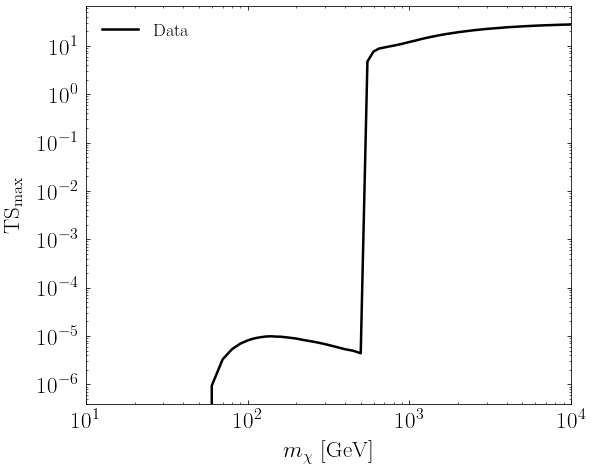

In [42]:
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.plot(plot_data.marr,np.percentile(maxTS_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Data',lw=2.5)

# plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[-1], 2.5, axis=1),np.percentile(maxTS_skylocs_ary[-1], 97.5, axis=1),color='yellow',label=r'95\% containment',alpha=0.6,lw=2)
# plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[-1], 16, axis=1),np.percentile(maxTS_skylocs_ary[-1], 84, axis=1),color='limegreen',label=r'68\% containment',alpha=0.7,lw=2)


plt.xscale("log")
plt.yscale("log")

plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"TS$_\mathrm{max}$",fontsize=23)

plt.xlim([1e1,1e4])
# plt.ylim([8e-28,2e-22])
# plt.yscale("log")
# plt.text(15.3, 100, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='upper left')


# plt.ylim(-0.1,100)
plt.tight_layout()

# plt.savefig(plots_dir + 'maxTS.pdf',bbox_inches='tight')





In [ ]:
plot_data_test = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=400000,
                        TS1000=9,
                        halos_ran=100, 
                        halos_to_keep=100,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

data_ary_test, _, maxTS_ary_test = plot_data_test.return_limits()

In [ ]:
save_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/DataArrays/'

oFig1 = plt.figure(1,figsize=(15,40))

for idx,i in tqdm_notebook(enumerate(range(20))):

    oFig1.add_subplot(10,2,idx+1)
#     plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[i], 2.5, axis=1),np.percentile(maxTS_skylocs_ary[i], 97.5, axis=1), alpha=0.6, color='yellow')
#     plt.fill_between(plot_data.marr,np.percentile(maxTS_skylocs_ary[i], 16, axis=1),np.percentile(maxTS_skylocs_ary[i], 84, axis=1), alpha=0.7, color='limegreen')
    plt.plot(plot_data.marr,np.percentile(maxTS_ary_test[i], 2.5, axis=1), alpha=1., color='k',ls='-')

    plt.xscale("log")
    plt.xlim(10,10000)
#     plt.ylim(0, 50)
    
#     plt.yscale("log")
    plt.xticks(fontsize=23);
    plt.yticks(fontsize=23);

    if i % 2 == 0: plt.ylabel("TS$_\mathrm{max}$",fontsize=23)
#     if i in plot_data.passed_halos:
#         plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='k')
#     else:
#         plt.text(10**1.1,45, r'\textbf{Object '+str(i)+'} / ' + catalog['paperName'].values[i].replace("_", ""), fontsize=19, color='red')
#     plt.text(10**1.1,38, '$\log_{10}J='+str(catalog['mulog10J_inf'].values[i])[:5] + "$ GeV$^2$ cm$^{-5}$ sr", fontsize=19, color='k')#/(GeV$^2$ cm$^{-5}$)

plt.tight_layout()
# plt.savefig(plots_dir + "data_individual_maxts.pdf")




In [ ]:
xsecs = np.logspace(-33,-18,301)

In [ ]:
LL1  = np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(plot_data.passed_halos[0]) + "_data.npz")['LL2'][11] + np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(plot_data.passed_halos[1]) + "_data.npz")['LL2'][11]
LL1-=LL1[0]
LL2  = np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(plot_data.passed_halos[2]) + "_data.npz")['LL2'][11]
LL2-=LL2[0]

In [ ]:
LL1

In [ ]:
print max(LL1)
print max(LL2)
print max(LL3)

In [ ]:
plt.plot(xsecs, LL1)
plt.ylim(-5 + LL1[0],5 + LL1[0])
plt.xscale("log")
plt.show()
plt.plot(xsecs, LL2)
plt.ylim(-5 + LL2[0],5 + LL2[0])
plt.xscale("log")
plt.show()

LL3 = LL1 + LL2
plt.plot(xsecs, LL3)
plt.ylim(-5 + LL3[0],5 + LL3[0])
plt.xscale("log")
plt.show()

In [ ]:
LL = np.zeros(len(np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['LL2'][5]))

for iobj in tqdm_notebook(plot_data.passed_halos[:3]):
# for iobj in tqdm_notebook([1,3,5]):
    LL_new = np.load("../data/Tully/LL2_TSmx_lim_b_o" + str(iobj) + "_data.npz")['LL2'][11]
#     LL_new -= LL_new[0]
    LL+= LL_new
    LL -= LL[0]
    plt.plot(xsecs, LL)
    plt.xscale("log")
#     plt.ylim(-5,5)
    plt.ylim(-5 + LL[0],5 + LL[0])
    plt.show()
#     plt.plot(xsecs, LL_new, color='forestgreen')
#     plt.xscale("log")
#     plt.ylim(-5 + LL_new[0],5 + LL_new[0])
#     plt.show()




#     print LL[0]

#     print np.max(LL)

# TS and xsec cuts

In [ ]:
plot_data_TS9 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=16,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

plot_data_xsec20 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=20,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

plot_data_nocut = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10000000000,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")


plot_data_noverlap5 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=5.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")


plot_data_bcut15 = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=15,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

In [ ]:
data_ary_TS9, _, _ = plot_data_TS9.return_limits()
data_ary_xsec20, _, _ = plot_data_xsec20.return_limits()
data_ary_nocut, _, _ = plot_data_nocut.return_limits()
data_ary_noverlap5, _, _ = plot_data_noverlap5.return_limits()
data_ary_bcut15, _, _ = plot_data_bcut15.return_limits()

In [ ]:

plot_data_Andromeda = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=4,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                               skip_halos=[])

In [ ]:
data_ary_Andromeda, _, _ = plot_data_Andromeda.return_limits()

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_TS9[-1], 2.5, axis=1), alpha=1, color='k',label=r'TS$_\mathrm{max < 100} = 9$, TS$_\mathrm{max > 100} = 16$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_xsec20[-1], 2.5, axis=1), alpha=1, color='k',label=r'$\widehat{\langle\sigma v\rangle} > 20 \times \langle\sigma v\rangle^*_\mathrm{lim}(m_\chi)$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_nocut[-1], 2.5, axis=1), alpha=1, color='k',label=r'No cuts',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(380., 1.5e-27, r'Effect of TS and $\langle\sigma v \rangle$ cuts',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_cuts.pdf',bbox_inches='tight')

In [ ]:
fig,ax = plt.subplots(1,figsize=(10/1.2,8/1.2))

# plt.plot(m_arr,data_lim,color='k',label=r'Galaxy groups (this work)',linewidth=2,linestyle='solid')
# plt.plot(m_arr,data_lim_nb,color='black',label=r'Galaxy groups (no boost)',linewidth=1,linestyle='dashed')

# fudge=1.0 
# plt.fill_between(m_arr,fudge*rot_q2p5,fudge*rot_q97p5,color='yellow',label=r'95\% containment',alpha=0.6)
# plt.fill_between(m_arr,fudge*rot_q16,fudge*rot_q84,color='limegreen',label=r'68\% containment',alpha=0.7)

plt.plot(plot_data.marr,10**np.percentile(data_ary[-1], 2.5, axis=1), alpha=1, color='k',label=r'Baseline')
plt.plot(plot_data.marr,10**np.percentile(data_ary_noverlap5[-1], 2.5, axis=1), alpha=1, color='k',label=r'No overlap within 5$^\circ$',ls='--')
plt.plot(plot_data.marr,10**np.percentile(data_ary_bcut15[-1], 2.5, axis=1), alpha=1, color='k',label=r'$|b| \geq 15$',ls='-.')
plt.plot(plot_data.marr,10**np.percentile(data_ary_Andromeda[-1], 2.5, axis=1), alpha=1, color='k',label=r'Including M31',ls='-', lw=2.2)
plt.plot(plot_data.marr,10**np.percentile(data_ary_10k[-1], 2.5, axis=1), alpha=1, color='k',label=r'10k halos',ls=':')




plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')
# plt.text(7000, 1.0e-27, r'$b \bar b$',fontsize=20,color='black')

# set the alpha value of the legend: it will be translucent
# leg.get_frame().set_alpha(0.1)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)
#plt.legend(fontsize=18,loc = 2)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(75., 1.5e-27, r'Non-overlapping halos and halo number',fontsize=20,color='black')

plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False)

plt.tight_layout()

plt.savefig(plots_dir + 'systematics_nh.pdf',bbox_inches='tight')

In [ ]:
    hp.mollview("/tigress/nrodd/DM-Catalog-Scan/DataFiles/MonteCarlo/MC_allhalos_p7")